In [1]:
import os
os.environ["SPS_HOME"] = "/Users/fpetri/packages/fsps" 

In [2]:
import numpy as np

import lbg_forecast.hyperparams as hyp
import lbg_forecast.tools as tools
import matplotlib.pyplot as plt

In [3]:
#uniform distribution for all
hyper_parameter_bounds = hyp.define_hyperparameter_bounds(
    zred = np.array([0, 0, 7]),
    logtage = np.array([0, -3, 1]),
    logzsol = np.array([0, -2.5, 0.5]),
    dust1 = np.array([0, 0, 2]),
    dust2 = np.array([0, 0, 2]),
    igm_factor = np.array([0, 0, 2]),#np.array([2, 0, 2]),
    gas_logu = np.array([0, -4, -1]),
    gas_logz = np.array([0, -2.5, 0.5]),
    fagn = np.array([0, 0, 10]),
    imf1 = np.array([0, 0.2, 2.6]), 
    imf2 = np.array([0, 1.0, 3.4]), 
    imf3 = np.array([0, 1.0, 3.4]), 
    logtau = np.array([0, -4, 1]),
    loga = np.array([0, -3, 3]),
    logb = np.array([0, -3, 3]),
    logmass = np.array([0, 7, 13])
)

hyperparameters = hyp.sample_hyper_parameters(hyper_parameter_bounds)
#hyp.plot_hyperparameters(10000, hyper_parameter_bounds, rows=7, nbins=20)


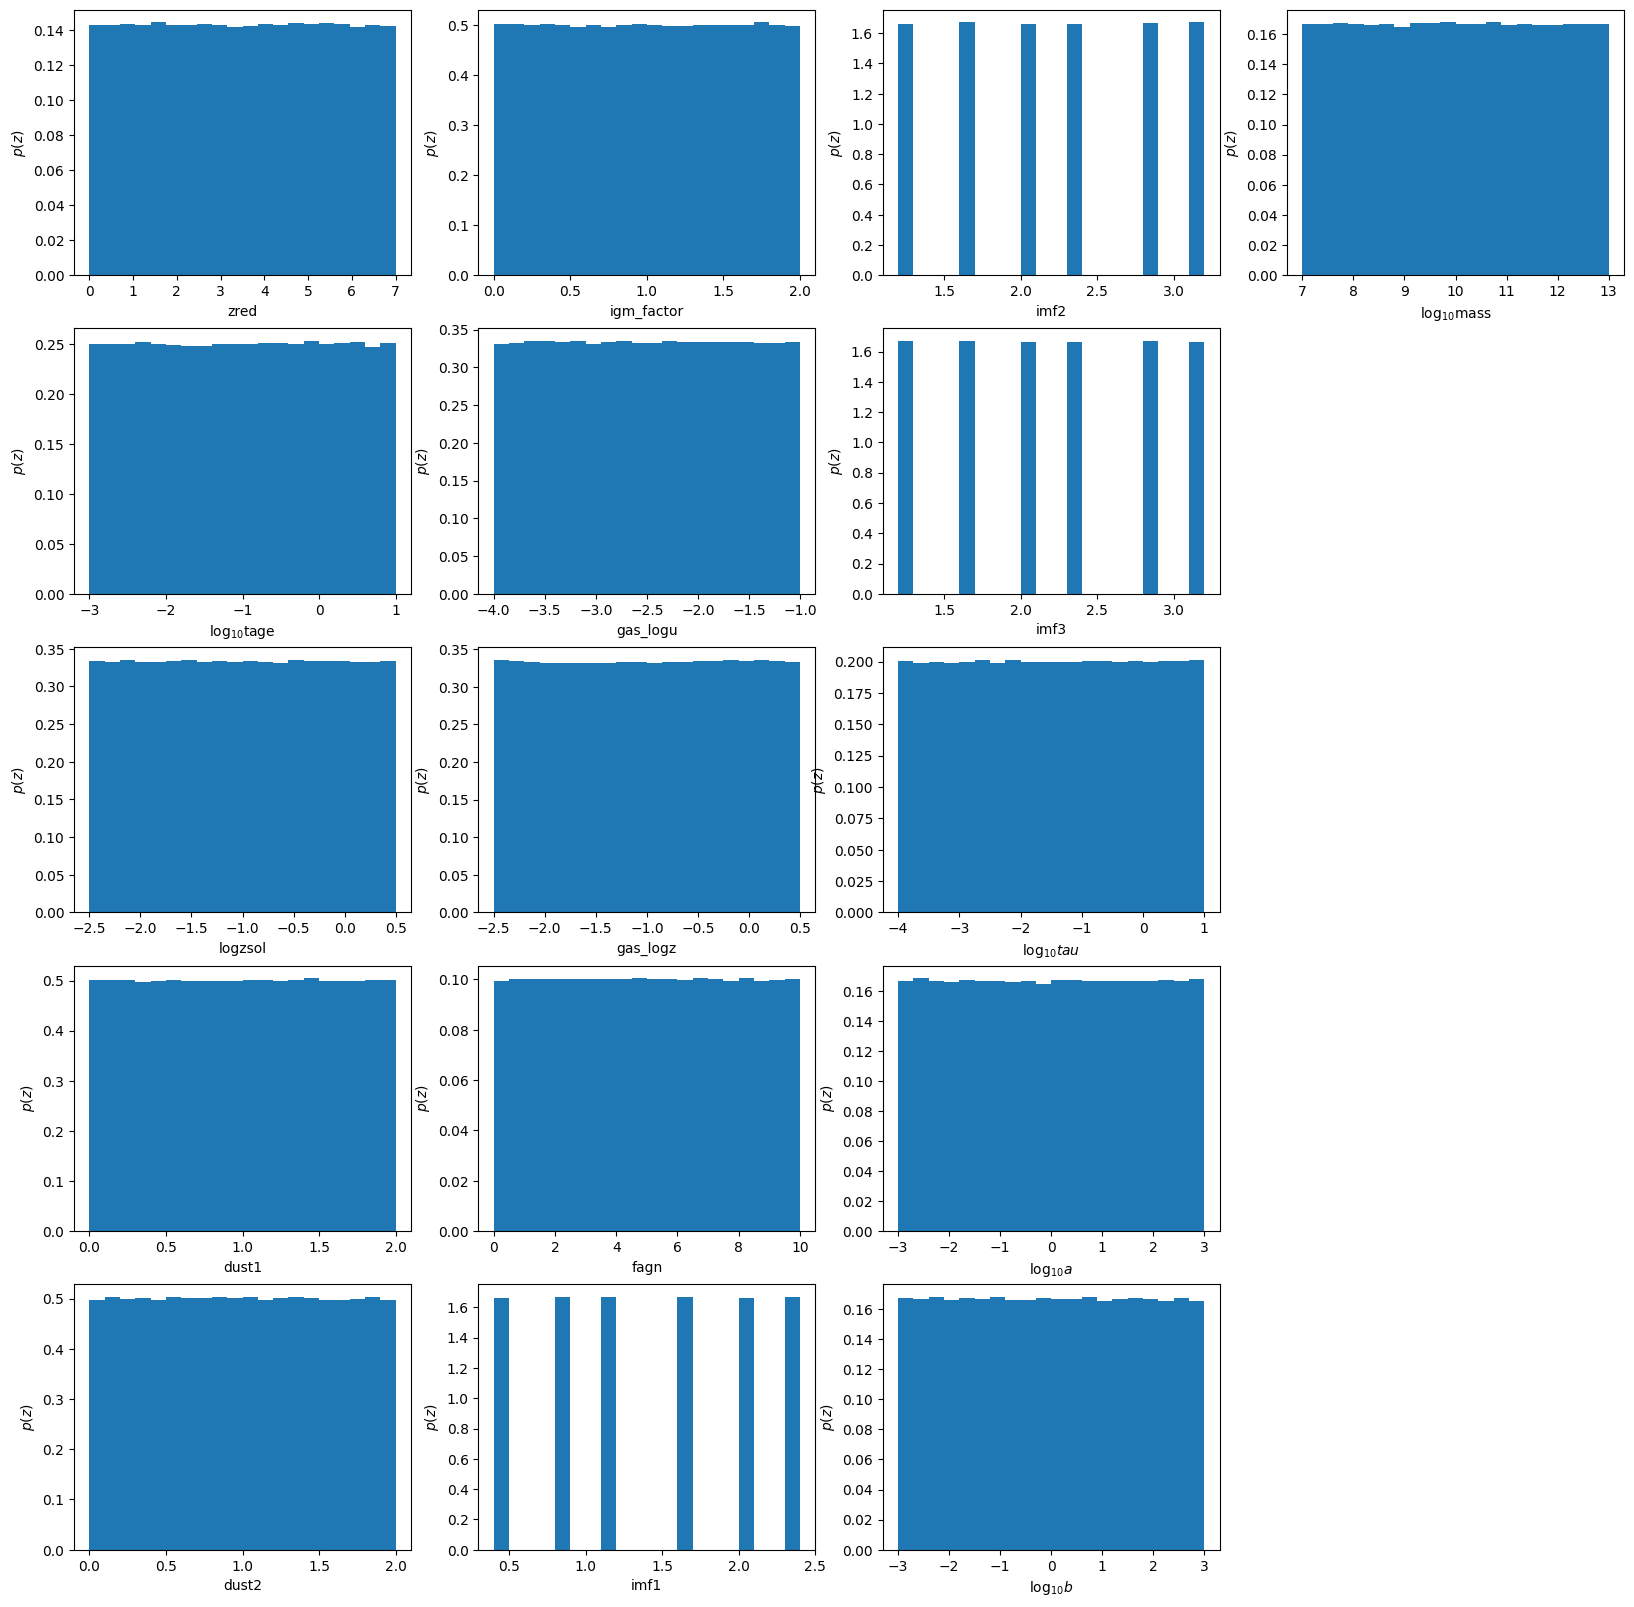

In [4]:
spsparams = tools.draw_sps_parameters(1000000, hyperparameters)
tools.plot_galaxy_population(spsparams)

In [5]:
print(set(spsparams[:,9]), set(spsparams[:,10]), set(spsparams[:,11]))

{0.4, 0.8, 2.0, 1.6, 1.2, 2.4} {1.2, 2.0, 2.4, 2.8, 1.6, 3.2} {1.2, 2.0, 2.4, 2.8, 1.6, 3.2}


In [6]:
data = tools.simulate_photometry(1000, hyperparameters, zhistory=True, nebem=True, dust_type=0, imf_type=2, filters='all')

TypeError: simulate_photometry() missing 2 required positional arguments: 'zhistory' and 'nebem'

Galaxy Age (Gyr): 0.01693489699997386
Observed Metallicity (Absolute Metallicity): 0.0012031248581964677


(array([4.49043428e-05, 4.49043428e-05, 4.49043428e-05, 4.49043428e-05,
        4.49043428e-05, 4.49043428e-05, 4.49043428e-05, 4.49043428e-05,
        4.49043428e-05, 4.49043428e-05, 4.49043428e-05, 4.49043428e-05,
        4.49043428e-05, 4.49043428e-05, 4.49043428e-05, 4.49043428e-05,
        4.49043428e-05, 4.49043428e-05, 4.49043428e-05, 4.49043428e-05,
        4.49043428e-05, 4.49043428e-05, 4.49043428e-05, 4.49043428e-05,
        4.49043428e-05, 4.49043428e-05, 4.49043428e-05, 4.49043428e-05,
        4.49043428e-05, 4.49043428e-05, 4.49043428e-05, 4.49043428e-05,
        4.49043428e-05, 4.49043428e-05, 4.49043428e-05, 4.49043428e-05,
        4.49043428e-05, 4.49043428e-05, 4.49043428e-05, 4.49043428e-05,
        4.49043428e-05, 4.49043428e-05, 4.49043428e-05, 4.49043428e-05,
        4.49043428e-05, 4.49043428e-05, 4.49043428e-05, 4.49043428e-05,
        4.49043428e-05, 4.49043428e-05, 4.49043428e-05, 4.49043428e-05,
        4.49043428e-05, 4.49043428e-05, 4.49043428e-05, 4.490434

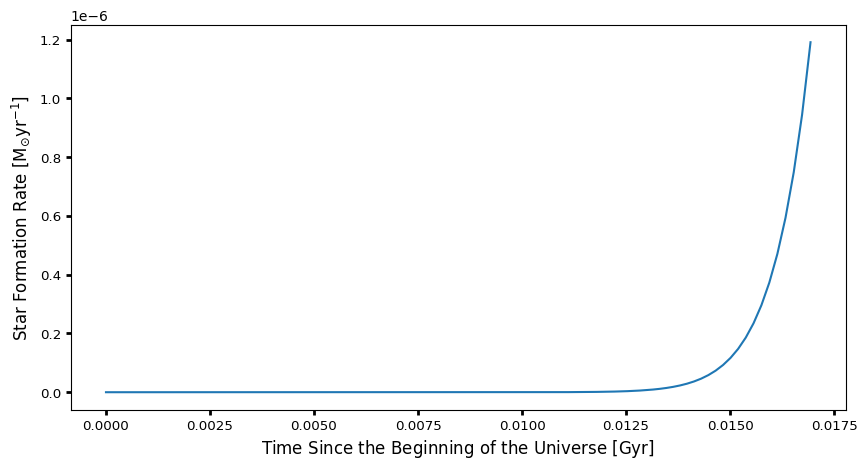

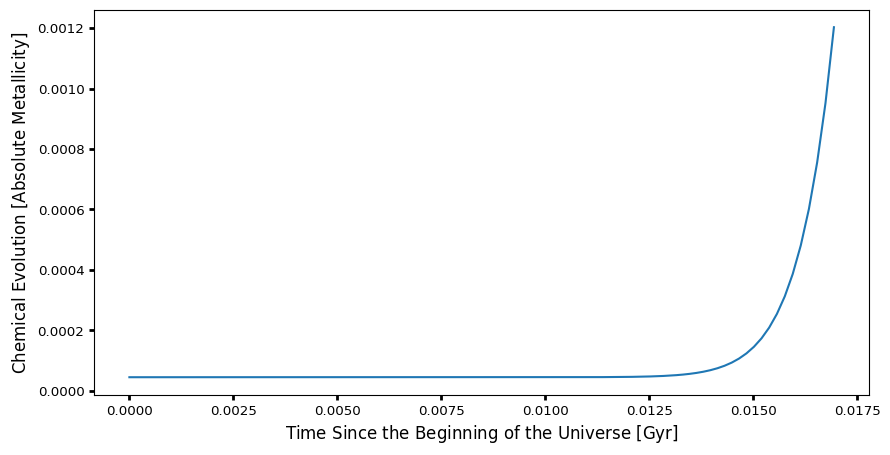

In [ ]:
tools.sfh_zhis_diag(data[1], 2)